## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
#sys.path.insert(0, '/home/miguel/anaconda3/lib/python3.6/site-packages/scikit_image-0.15.dev0-py3.6-linux-x86_64.egg/')
import skimage
# Importing gempy
import gempy as gp
import matplotlib.pyplot as plt
# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
skimage.__version__

'0.15.dev0'

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [3]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', recompile=False)

In [10]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            5
          number series                              4
          number surfaces per series      [1, 2, 1, 1]
          len surfaces surface_points  [6, 4, 4, 6, 6]
          len series surface_points       [6, 8, 6, 6]
          len series orientations         [3, 4, 3, 3]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                1854.72
          $C_o$                                81904.8
          drift equations                    [3 3 3 3]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                         NaN
          centers                      [nan, nan, nan]

In [13]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


In [14]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [12]:
geo_model.surface_points.df['series']

0     seafloor_series
1     seafloor_series
2     seafloor_series
3     seafloor_series
4     seafloor_series
5     seafloor_series
7        right_series
6        right_series
8        right_series
9        right_series
13       right_series
12       right_series
11       right_series
10       right_series
14       onlap_series
15       onlap_series
16       onlap_series
17       onlap_series
18       onlap_series
19       onlap_series
20        left_series
21        left_series
22        left_series
23        left_series
24        left_series
25        left_series
Name: series, dtype: category
Categories (5, object): [basement, left_series, onlap_series, right_series, seafloor_series]

In [6]:
geo_model.update_from_series()

In [7]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            5
          number series                              4
          number surfaces per series      [1, 2, 1, 1]
          len surfaces surface_points  [6, 4, 4, 6, 6]
          len series surface_points       [6, 8, 6, 6]
          len series orientations         [3, 4, 3, 3]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                1854.72
          $C_o$                                81904.8
          drift equations                 [3, 3, 3, 3]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                         NaN
          centers                      [nan, nan, nan]

In [8]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


Displaying the input data:

In [9]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [10]:
gp.activate_interactive_df(geo_model)

In [11]:
#geo_model.qi.get('orientations')

In [12]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [14]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [15]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

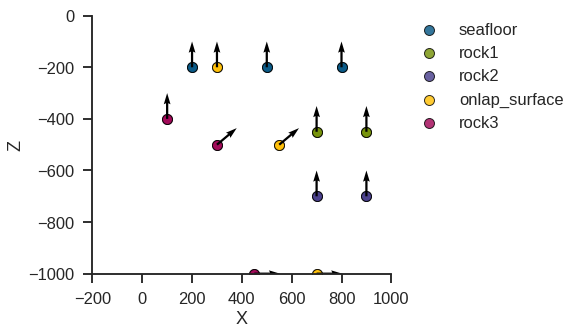

In [16]:
gp.plot.plot_data(geo_model, direction='y')

In [17]:
gp.set_interpolation_data(geo_model, verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [18]:
geo_model.set_regular_grid([-200,1000,-500,500,-1000,0], [50,50,50])

In [19]:
geo_model.update_to_interpolator()

In [20]:
geo_model.surface_points.sort_table()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,200.0,0.0,-200.0,0.31260,0.46885,0.75010,seafloor,seafloor_series,1,1
1,200.0,100.0,-200.0,0.31260,0.53135,0.75010,seafloor,seafloor_series,1,1
2,500.0,0.0,-200.0,0.50010,0.46885,0.75010,seafloor,seafloor_series,1,1
3,500.0,100.0,-200.0,0.50010,0.53135,0.75010,seafloor,seafloor_series,1,1
4,800.0,0.0,-200.0,0.68760,0.46885,0.75010,seafloor,seafloor_series,1,1
5,800.0,100.0,-200.0,0.68760,0.53135,0.75010,seafloor,seafloor_series,1,1
7,700.0,0.0,-450.0,0.62510,0.46885,0.59385,rock1,right_series,2,2
6,700.0,100.0,-450.0,0.62510,0.53135,0.59385,rock1,right_series,2,2
8,900.0,0.0,-450.0,0.75010,0.46885,0.59385,rock1,right_series,2,2
9,900.0,100.0,-450.0,0.75010,0.53135,0.59385,rock1,right_series,2,2


In [ ]:
gp.compute_model(geo_model, compute_mesh=True)

In [22]:
geo_model.solutions.scalar_field_at_surface_points

array([[1.5002    , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.1877    , 0.8752    , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.85073992, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.60742812]])

In [23]:
geo_model.surfaces.df.groupby('series').get_group('right_series').index

Int64Index([1, 2], dtype='int64')

In [24]:
geo_model.solutions.surfaces = geo_model.surfaces
geo_model.solutions.set_model_order()

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


../../gempy/plot/visualization.py:305: FutureWarning: Passing the block directly will get deprecated in the next version. Please use Solutionand block_type instead
  'and block_type instead', FutureWarning)


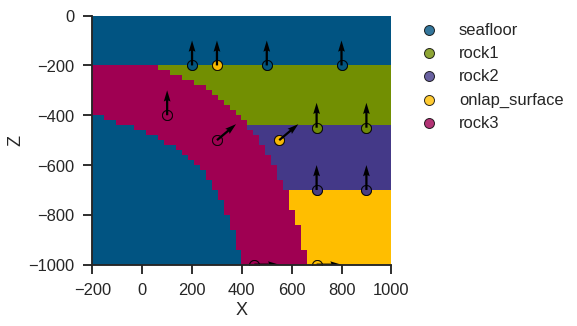

In [25]:
gp.plot.plot_section(geo_model, 2, block_type=geo_model.solutions.lith_block, plot_data=True)

In [26]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


In [27]:
geo_model.surface_points.sort_table()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,200.0,0.0,-200.0,0.31260,0.46885,0.75010,seafloor,seafloor_series,1,1
1,200.0,100.0,-200.0,0.31260,0.53135,0.75010,seafloor,seafloor_series,1,1
2,500.0,0.0,-200.0,0.50010,0.46885,0.75010,seafloor,seafloor_series,1,1
3,500.0,100.0,-200.0,0.50010,0.53135,0.75010,seafloor,seafloor_series,1,1
4,800.0,0.0,-200.0,0.68760,0.46885,0.75010,seafloor,seafloor_series,1,1
5,800.0,100.0,-200.0,0.68760,0.53135,0.75010,seafloor,seafloor_series,1,1
7,700.0,0.0,-450.0,0.62510,0.46885,0.59385,rock1,right_series,2,2
6,700.0,100.0,-450.0,0.62510,0.53135,0.59385,rock1,right_series,2,2
8,900.0,0.0,-450.0,0.75010,0.46885,0.59385,rock1,right_series,2,2
9,900.0,100.0,-450.0,0.75010,0.53135,0.59385,rock1,right_series,2,2


In [28]:
geo_model.solutions.scalar_field_at_surface_points

array([[1.5002    , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.1877    , 0.8752    , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.85073992, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.60742812]])

In [29]:
_ = geo_model.solutions.scalar_field_at_surface_points[1][np.nonzero(geo_model.solutions.scalar_field_at_surface_points[1])]
np.argsort(_)

array([1, 0])

In [30]:
_

array([1.1877, 0.8752])

In [31]:
geo_model.surfaces.df.groupby('series').get_group('right_series').index

Int64Index([1, 2], dtype='int64')

In [32]:
geo_model.modify_order_surfaces([1,2], [2,1], series = 'right_series')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
%debug

In [ ]:
np.concatenate(([3,4,5], [3]))
np.

In [ ]:
%debug

In [ ]:
geo_model.surfaces.modify_order_surfaces??

In [ ]:
geo_model.solutions.scalar_field_at_surface_points

In [ ]:
geo_model.solutions.scalar_field_matrix.shape

In [ ]:
gp.plot.plot_scalar_field(geo_model, 25, series=1)
plt.colorbar()

In [ ]:
gp.plot.plot_surfaces_3D(geo_model, geo_model.solutions.vertices, geo_model.solutions.edges)

Update if any changes were made:

In [ ]:
#geo_model.update_to_interpolator()
#gp.compute_model(geo_model, compute_mesh=False)

Save model if any changes were made:

In [ ]:
#geo_model.save_model('Tutorial_ch1-8_Onlap_relations')